In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задание 1.1 (0.5 балла) Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 имеют метку класса $k_2$. Рассчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [ ]:
import math
arr = [2, 8]
print(-sum(( el/sum(arr))*math.log(el/sum(arr)) for el in arr), '〜>', round(-sum(( el/sum(arr))*math.log(el/sum(arr)) for el in arr), 2) )


0.5004024235381879 〜> 0.5


In [ ]:
a = {"a", "b"}
print(a["a"])

TypeError: ignored

Задание 1.2 (0.5 балла)
Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$\Large Q(R_M, j, t) = H(R_M) - \frac{\left| R_l \right|}{\left| R_m \right|} H(R_l) - \frac{\left| R_r \right|}{\left| R_m \right|} H(R_r)$

$\Large H(R_M) = 0.8*0.2 + 0.2*0.8 = 0.32$

$\Large H(R_l) = H(R_l) = 1*0 = 0$

ОТВЕТ:     $\LARGE 0.32$

Задание 1.3 (0.5 балла)
Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: $[1, 10, 5, 18, 100, 30, 50, 61, 84, 47]$ (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [ ]:
a = np.array([1, 10, 5, 18, 100, 30, 50, 61, 84, 47])

print(a.mean())

40.6


На лекции было, что это среднее значение целевых переменных объектов, попавших в лист.

# **Часть 2** #



Задание 2.1

In [ ]:
from collections import Counter
from typing import Dict, List, Tuple, Union

In [ ]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame],
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений приif task знака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)

    в случае регрессии возвращаем не Джини, а дисперсию
    """


    def disp(X):
      return np.var(X)
    def Gini(X):
      size, count = len(X), np.unique(X, return_counts = True)[1]
      return sum(count/size - (count/size)**2)

    if isinstance(feature_vector, pd.DataFrame):
        feature_vector = feature_vector.values

    if isinstance(target_vector, pd.Series):
        target_vector = target_vector.values

    best_gini_value = np.inf
    best_thres = None


    indexs = np.argsort(feature_vector)
    vector = feature_vector[indexs]
    target = target_vector[indexs]



    for i in range(len(vector)-1):
      if feature_type == "real":
        thres = 0.5*vector[i] + 0.5*vector[i+1]


      elif feature_type == "categorial":
        thres = vector[i+1]


      l_ind = vector == (thres)


      left = vector[l_ind]
      right = vector[~l_ind]



      if task == "classification":
        Lgini = Gini(left)
        Rgini = Gini(right)
        gini_value = (Lgini*len(left) + Rgini*len(right))/(len(left)+len(right))
      elif task == "regression":
        Ldisp = disp(left)
        Rdisp = disp(right)
        gini_value = (Ldisp*len(left) + Rdisp*len(right))/(len(left)+len(right))

      best_gini_value = gini_value if gini_value<best_gini_value else best_gini_value
      best_thres = thres if gini_value<best_gini_value else thres

    threses = np.unique(vector)
    ginis = np.zeros_like(threses)

    for j, k in enumerate(threses):
            Left = vector <= k
            left_targ = target[Left]
            right_targ = target[~Left]
            if task == "classification":
                gini_left = Gini(left_targ)
                gini_right = Gini(right_targ)
                ginis[j] = (len(left_targ) * gini_left + len(gini_targ) * gini_right) / len(target)
            else:
                Ldisp = disp(left_targ)
                Rdisp = disp(right_targ)
                ginis[j] = (len(left_targ) * Ldisp + len(right_targ) * Rdisp) / len(target)


    return threses, ginis, best_thres, best_gini_value


In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = pd.DataFrame(data=california["data"], columns=california["feature_names"])
y = california["target"]
print(X.head())

print(california["DESCR"])

a, b, c, d = (find_best_split(
    X["MedInc"].to_numpy(),
    y,
    task="regression",
    feature_type="real"
))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     av

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
a, b, c, d

(array([ 0.4999,  0.536 ,  0.5495, ..., 14.9009, 15.    , 15.0001]),
 array([1.3314415 , 1.3313647 , 1.3313254 , ..., 1.31198934, 1.31282443,
               nan]),
 15.0001,
 3.3143904996500724)

# **Часть 3** #

Dataset shape: (768, 9)


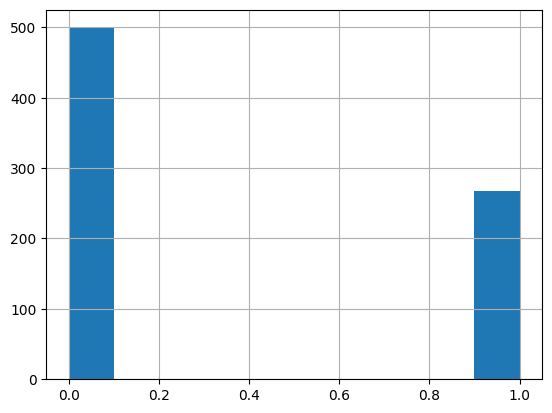

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score as accuracy, precision_score as precision, recall_score as recall, roc_auc_score as roc_auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('https://github.com/Murcha1990/ML_math_2022/raw/2a512ab0ec6ee4936cbe6c3dc041bce31e05e8c0/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B8/HW_4/Data/diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

data['Outcome'].hist()
plt.show()

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X, y = data.drop('Outcome', axis = 1), data["Outcome"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 25)

X_tran_train, X_train_valid, y_train_train, y_train_valid = train_test_split(Xtrain, ytrain, test_size = 0.3, random_state = 25)

In [ ]:
params = {'max_depth' : np.arange(2,10),
          'min_samples_leaf': np.arange(1,10)}

model1 = GridSearchCV(DecisionTreeClassifier(), params, cv=3, scoring='f1', verbose=2)

model1.fit(X_train_valid, y_train_valid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ....................max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=1; total time=   0.1s
[CV] END ....................max_depth=2, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.1s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....................max_depth=2, min_s

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1', verbose=2)

In [ ]:
print("Accuracy:", accuracy(model1.predict(Xtest), ytest))
print("Presicion:", precision(model1.predict(Xtest), ytest))
print("Recall:", recall(model1.predict(Xtest), ytest))
print("ROC_AUC:", roc_auc(model1.predict(Xtest), ytest))

Accuracy: 0.7229437229437229
Presicion: 0.6338028169014085
Recall: 0.5421686746987951
ROC_AUC: 0.6832464995115598


Качество далеко от хорошего, точность и полнота совсем хромают, что неудивительно при обучении на малой части выборке

In [ ]:
model2 = BaggingClassifier(base_estimator = RandomForestClassifier(),
                          n_estimators = 50,
                          random_state = 28
                          )
model2.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=28)

In [ ]:
print("Accuracy:", accuracy(model2.predict(Xtest), ytest))
print("Presicion:", precision(model2.predict(Xtest), ytest))
print("Recall:", recall(model2.predict(Xtest), ytest))
print("ROC_AUC:", roc_auc(model2.predict(Xtest), ytest))

Accuracy: 0.8095238095238095
Presicion: 0.6901408450704225
Recall: 0.6901408450704225
ROC_AUC: 0.7763204225352113


Баггинг, обучаясь на 70% всех данных чуть лучше справился задачей, если сравнивать с предыдущей моделью

In [ ]:
params = {'max_depth' : np.arange(2,10),
          'min_samples_split' : np.arange(2,10,1)}

model3 = GridSearchCV(RandomForestClassifier(n_estimators = 50), params, cv=3, scoring='f1', verbose=2)

model3.fit(Xtrain, ytrain)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.2s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.4s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.3s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.4s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.3s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.5s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.5s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.4s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.5s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.6s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.3s
[CV] END ...................max_depth=2, min_sa

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1', verbose=2)

In [ ]:
print("Accuracy:", accuracy(model3.predict(Xtest), ytest))
print("Presicion:", precision(model3.predict(Xtest), ytest))
print("Recall:", recall(model3.predict(Xtest), ytest))
print("ROC_AUC:", roc_auc(model3.predict(Xtest), ytest))

Accuracy: 0.7748917748917749
Presicion: 0.6197183098591549
Recall: 0.6376811594202898
ROC_AUC: 0.7355072463768116


Случайный лес хорошо справился с задачей, но чуть хуже, чем Баггинг. Так же, как и в баггинге точность не очень хорошая.

In [ ]:
model3.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_split=9, n_estimators=50)

#3.5#

In [ ]:
sp = []
for i in range(2, 100):

  model = RandomForestClassifier(n_estimators = i, n_jobs=-1)
  model.fit(X, y)

  pred_train = model.predict(Xtrain)

  sp.append(roc_auc(ytrain, pred_train))

Text(0, 0.5, 'f1')

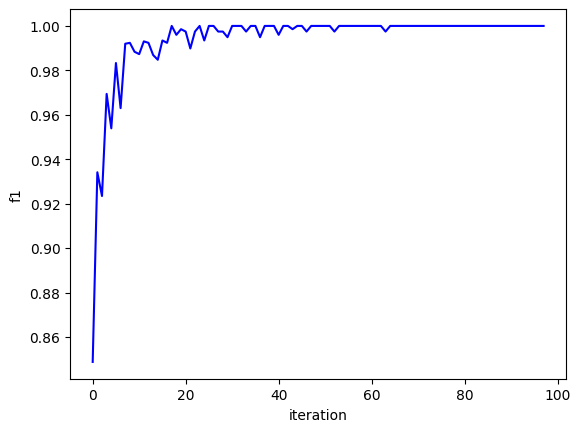

In [ ]:
plt.plot(sp, color='blue')
plt.xlabel('iteration')
plt.ylabel('f1')


Text(0, 0.5, 'f1')

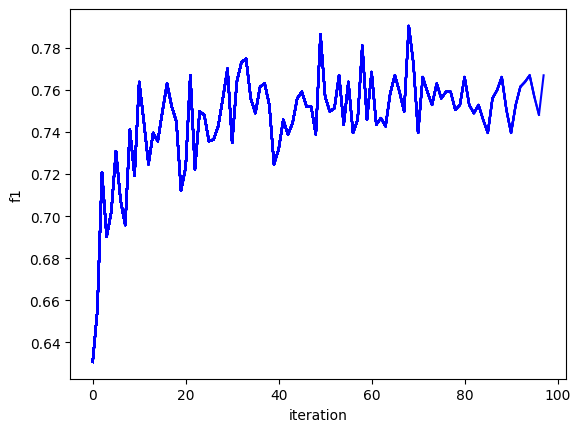

In [ ]:
sp = []
for i in range(2, 100):

  model = RandomForestClassifier(n_estimators = i, n_jobs=-1)
  model.fit(Xtrain, ytrain)

  pred_test = model.predict(Xtest)

  sp.append(roc_auc(ytest, pred_test))
  plt.plot(sp, color='blue')
plt.xlabel('iteration')
plt.ylabel('f1')

Как мы видим, на трейне качетво уже при 20-30 деревьев примерно единица, а вот на тесте после 50 деревьев уже не сильно меняется качество модели.

#3.6#

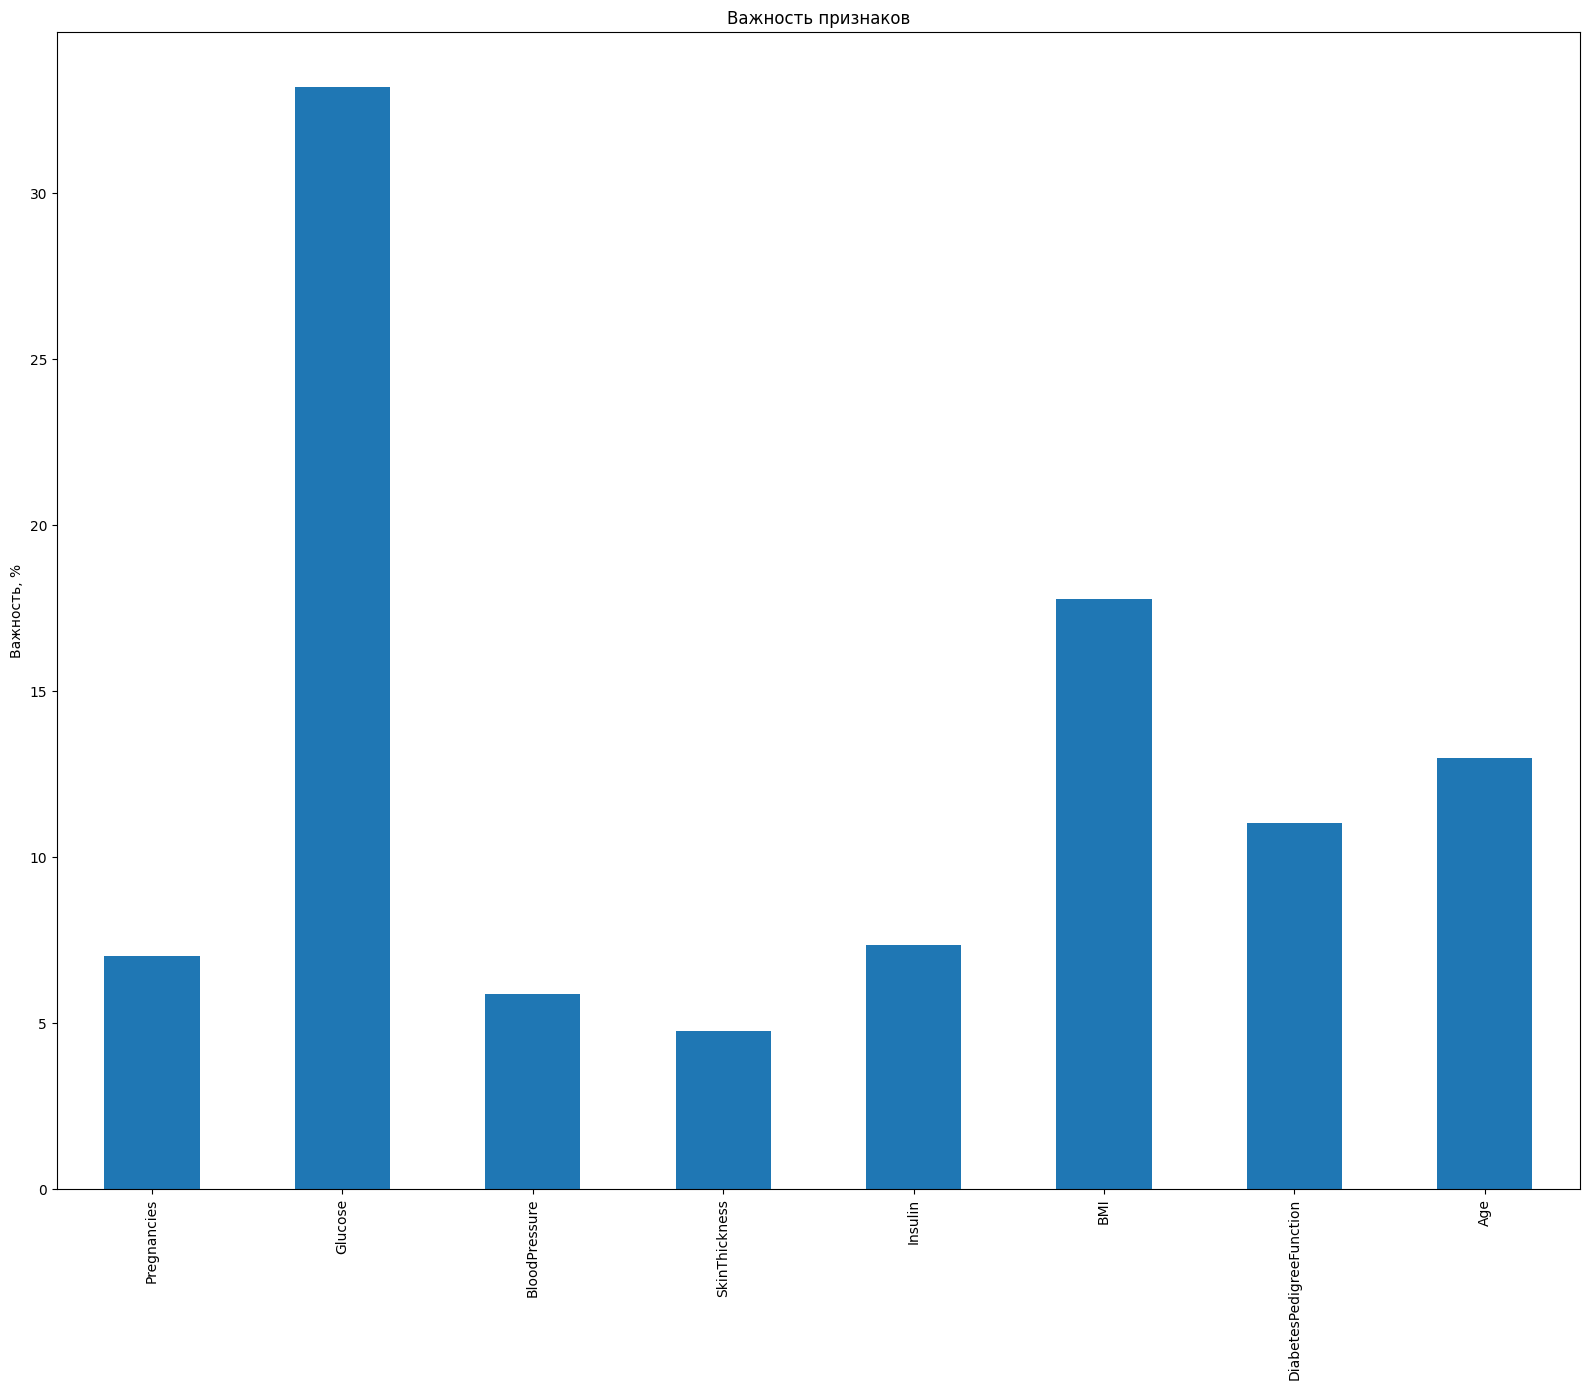

In [ ]:
model = RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=50)
model.fit(X, y)
feature_importances = model.feature_importances_

pl = pd.Series(feature_importances*100,
                         data.drop(['Outcome'], axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
pl.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

Получается, что Glucose - наиболее важный признак.